In [247]:
import pandas as pd
import pyreadr
from rdatasets import data
import datetime as dt
import matplotlib.pyplot as plt
#from rdatasets import summary

In [186]:
result = pyreadr.read_r('Documents/Data/ansett.rda',use_objects='ansett')
ansett_airlines = result['ansett']

In [187]:
ansett_airlines['bop_date'] = pd.to_datetime(ansett_airlines.Week,unit='D')
ansett_airlines['Week'] = ansett_airlines['bop_date'].dt.strftime("%Y-%U")

In [188]:
ansett_airlines.head()

,Week,Airports,Class,Passengers,bop_date
0,1989-28,ADL-PER,Business,193.0,1989-07-10
1,1989-29,ADL-PER,Business,254.0,1989-07-17
2,1989-30,ADL-PER,Business,185.0,1989-07-24
3,1989-31,ADL-PER,Business,254.0,1989-07-31
4,1989-32,ADL-PER,Business,191.0,1989-08-07


In [189]:
ansett_airlines['passenger_000s'] = round(ansett_airlines['Passengers']/1000,0)
mel_syd = ansett_airlines[(ansett_airlines['Airports']=='MEL-SYD') & (ansett_airlines['Class']=='Economy')][['Week','passenger_000s']]

In [190]:
mel_syd.set_index('Week',inplace=True)

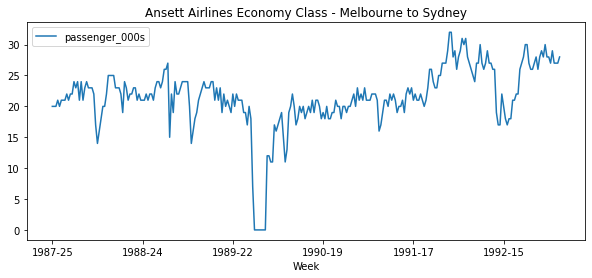

In [191]:
mel_syd.plot(title="Ansett Airlines Economy Class - Melbourne to Sydney",figsize=(10,4))
plt.show()

In [227]:
pbs = pyreadr.read_r('Documents/Data/PBS.rda',use_objects='PBS')

pbs = pbs['PBS']
a10 = pbs[pbs['ATC2']=='A10'].copy()

In [228]:
a10.sample(n=5)

,Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
1618,10712.0,Concessional,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,224435.0,5897097.96
52233,10682.0,General,Safety net,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,283.0,8375.08
35600,9556.0,General,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,10032.0,1305393.87
18736,13818.0,Concessional,Safety net,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,261697.0,10546703.11
35611,9893.0,General,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,10054.0,1361662.74


In [229]:
a10['month'] = pd.to_datetime(a10.Month,unit='D')
a10['year_month'] = a10['month'].dt.strftime("%Y-%m")

In [226]:
a10[a10['Year_Month']=='1991-07']

,Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost,month,Year_Month
1524,7851.0,Concessional,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,89733.0,2092878.0,1991-07-01,1991-07
18540,7851.0,Concessional,Safety net,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,9840.0,247655.0,1991-07-01,1991-07
35544,7851.0,General,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,11716.0,1138169.0,1991-07-01,1991-07
52140,7851.0,General,Safety net,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,2058.0,47889.0,1991-07-01,1991-07


In [252]:
monthly_cost = a10.groupby('year_month').agg({'Cost':'sum'},as_index=False)

monthly_cost = monthly_cost.rename(columns={'Cost':'Total_Cost'})

monthly_cost['Total_Cost']= monthly_cost['Total_Cost'].apply(lambda x: x/1e6)

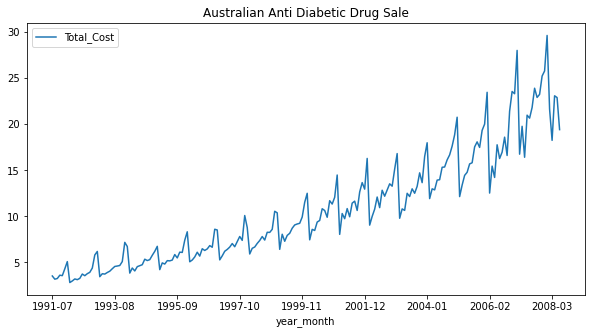

In [254]:
monthly_cost.plot(title="Australian Anti Diabetic Drug Sale",figsize=(10,5))
plt.show()